In [ ]:
import pandas as pd 
from pandas import set_option
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sp
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/HR-Employee-Attrition.csv') #laoding dataset

In [ ]:
data.head(5) # dataset view

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [ ]:
data.shape # shape of the data frame

(1470, 35)

In [ ]:
data.dtypes # datatypes of attributes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
set_option('precision',3)
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000,1470.000,1470.000,1470.000,1470.0,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.00,1470.000,1470.000,1470.0,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000
mean,36.924,802.486,9.193,2.913,1.0,1024.865,2.722,65.891,2.730,2.064,2.729,6502.931,14313.103,2.693,15.21,3.154,2.712,80.0,0.794,11.280,2.799,2.761,7.008,4.229,2.188,4.123
std,9.135,403.509,8.107,1.024,0.0,602.024,1.093,20.329,0.712,1.107,1.103,4707.957,7117.786,2.498,3.66,0.361,1.081,0.0,0.852,7.781,1.289,0.706,6.127,3.623,3.222,3.568
min,18.000,102.000,1.000,1.000,1.0,1.000,1.000,30.000,1.000,1.000,1.000,1009.000,2094.000,0.000,11.00,3.000,1.000,80.0,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000
25%,30.000,465.000,2.000,2.000,1.0,491.250,2.000,48.000,2.000,1.000,2.000,2911.000,8047.000,1.000,12.00,3.000,2.000,80.0,0.000,6.000,2.000,2.000,3.000,2.000,0.000,2.000
50%,36.000,802.000,7.000,3.000,1.0,1020.500,3.000,66.000,3.000,2.000,3.000,4919.000,14235.500,2.000,14.00,3.000,3.000,80.0,1.000,10.000,3.000,3.000,5.000,3.000,1.000,3.000
75%,43.000,1157.000,14.000,4.000,1.0,1555.750,4.000,83.750,3.000,3.000,4.000,8379.000,20461.500,4.000,18.00,3.000,4.000,80.0,1.000,15.000,3.000,3.000,9.000,7.000,3.000,7.000
max,60.000,1499.000,29.000,5.000,1.0,2068.000,4.000,100.000,4.000,5.000,4.000,19999.000,26999.000,9.000,25.00,4.000,4.000,80.0,3.000,40.000,6.000,4.000,40.000,18.000,15.000,17.000


In [ ]:
data.describe().shape 

(8, 26)

In [ ]:
data.Attrition.unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
print("---------")
for column in data.columns:
  print("---------")
  print(column)
  print('Unique values',data[column].unique())
  print('number of unique values',data[column].unique().shape)
  print("---------")
 

---------
---------
Age
Unique values [41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
number of unique values (43,)
---------
---------
Attrition
Unique values ['Yes' 'No']
number of unique values (2,)
---------
---------
BusinessTravel
Unique values ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
number of unique values (3,)
---------
---------
DailyRate
Unique values [1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  871  665 1040 1420  240 128

In [ ]:
data_numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(data_numeric_cols)
print(len(data_numeric_cols))
data_categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
print(data_categorical_cols)
print(len(data_categorical_cols))

['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
26
['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']
9


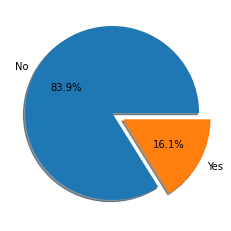

In [ ]:
r = data.groupby('Attrition')['Attrition'].count()
plt.pie(r, explode=[0.05, 0.1], labels=['No', 'Yes'], radius=1, autopct='%1.1f%%',  shadow=True);

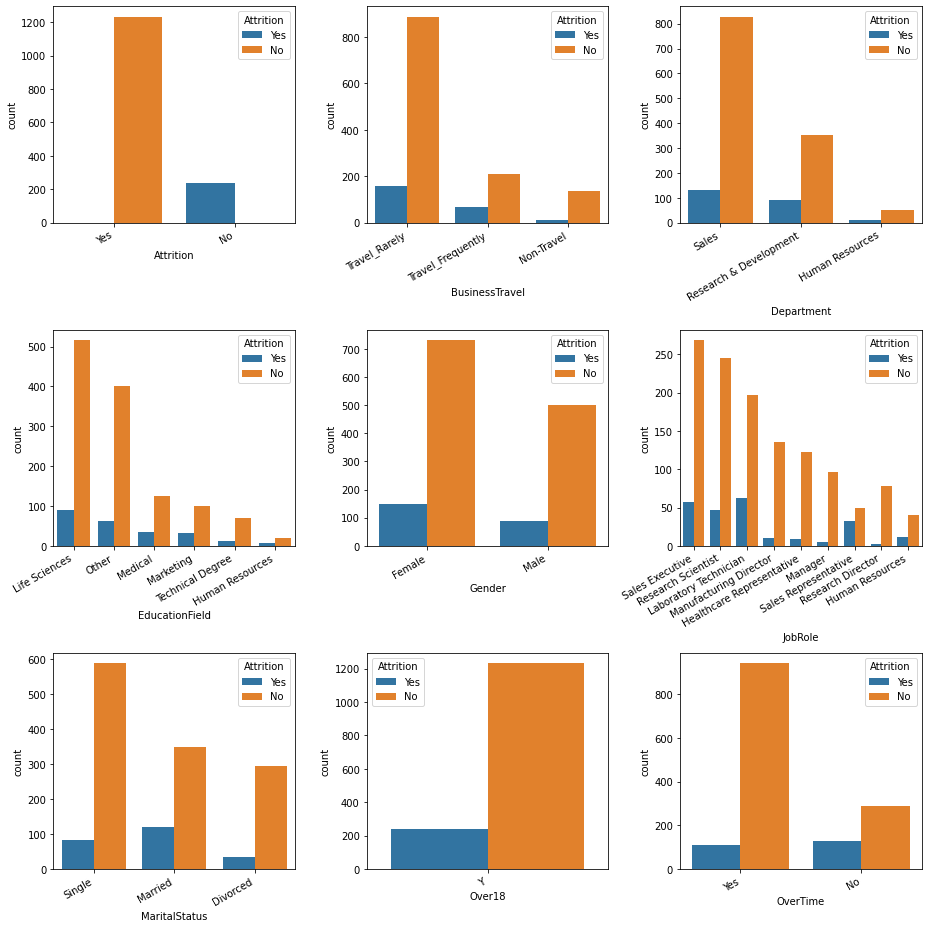

In [ ]:
fig, ax = plt.subplots(3,3, figsize = (13,13))

ax = np.ravel(ax)
for i in range(len(data_categorical_cols)):
    sns.countplot(data = data, x = data_categorical_cols[i], hue="Attrition",ax = ax[i], order = data[data_categorical_cols[i]].value_counts().index)
    ax[i].set_xticklabels(labels = data[data_categorical_cols[i]].unique(), rotation=30, ha='right')
    
#ax = np.reshape(ax, (3, 3))

plt.tight_layout()

<Figure size 432x288 with 0 Axes>

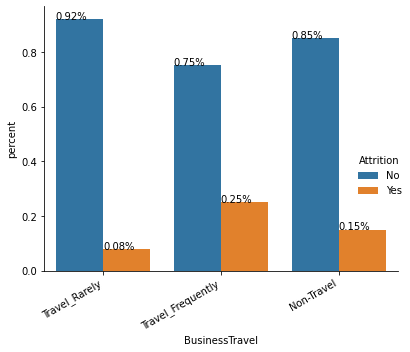

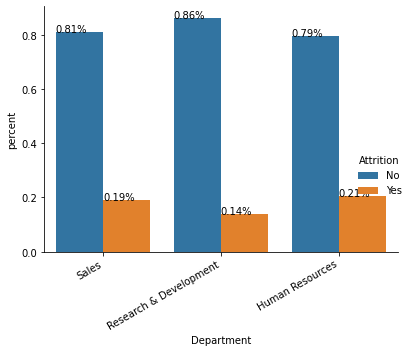

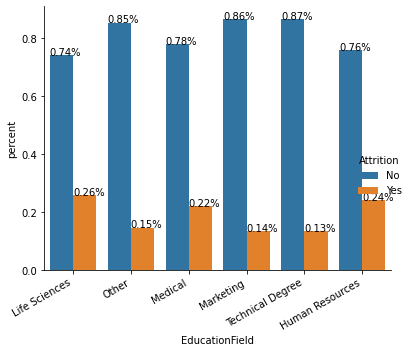

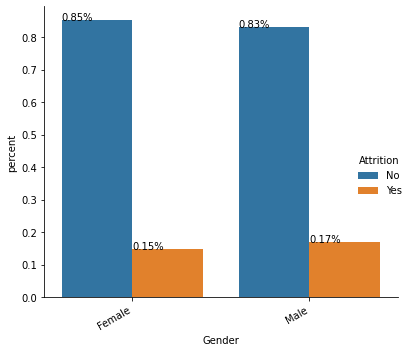

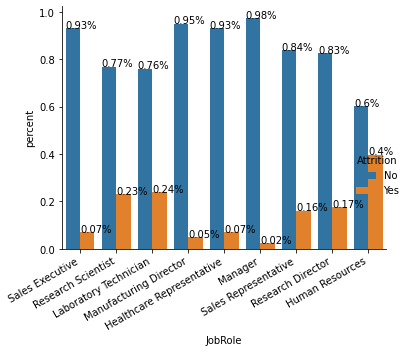

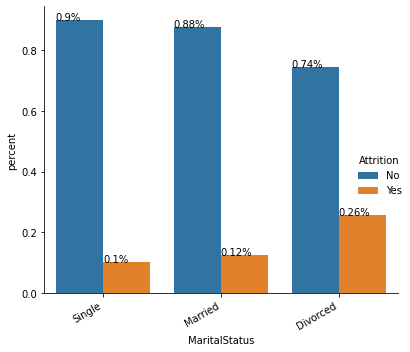

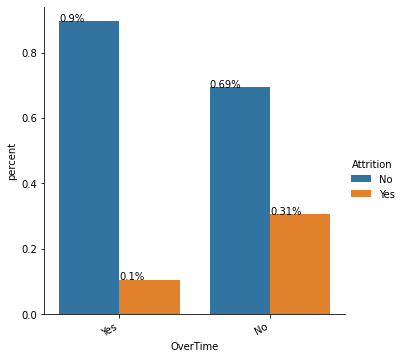

In [ ]:

df =data
ax = np.ravel(ax)
d=[ 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
for i in range(len(d)):
  plt.tight_layout()
  x,y = d[i], 'Attrition'
  df1 = df.groupby(x)[y].value_counts(normalize=True)
  
  df1 = df1.rename('percent').reset_index()
  g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
  g.ax.set_xticklabels(labels = data[d[i]].unique(), rotation=30, ha='right')
  
  for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
    
#ax = np.reshape(ax, (3, 3))



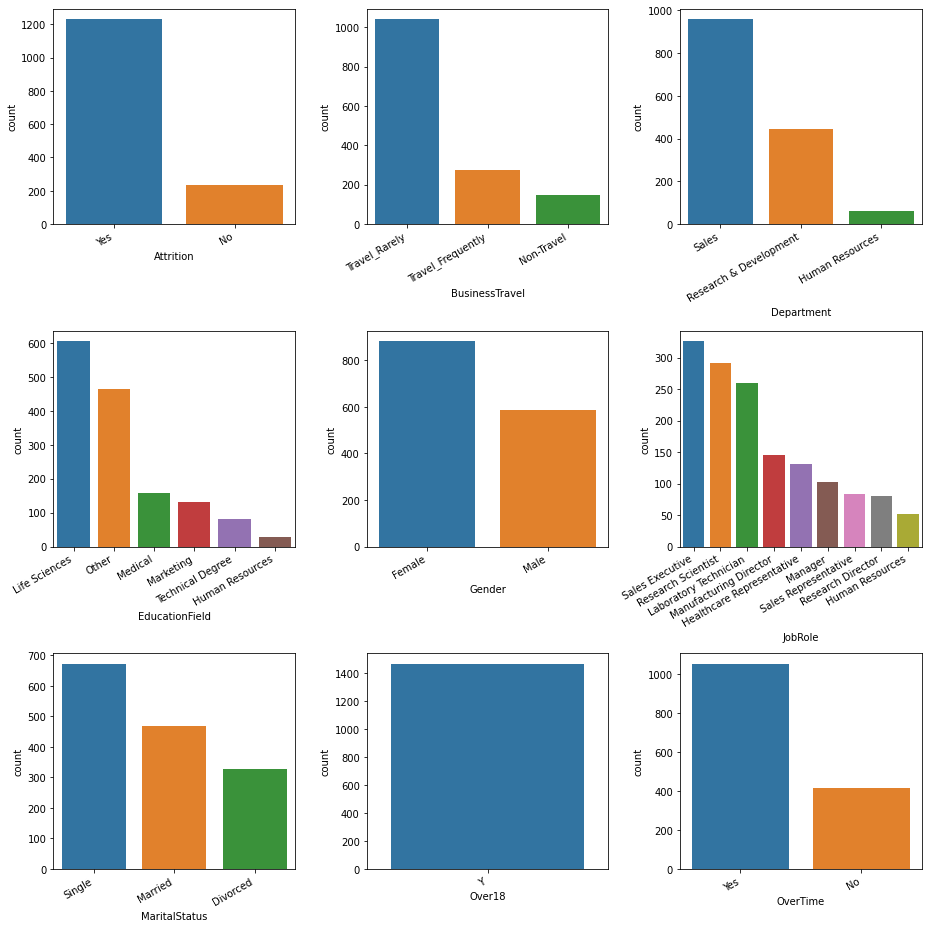

In [ ]:
fig, ax = plt.subplots(3,3, figsize = (13,13))

ax = np.ravel(ax)
for i in range(len(data_categorical_cols)):
    sns.countplot(data = data, x = data_categorical_cols[i],ax = ax[i], order = data[data_categorical_cols[i]].value_counts().index)
    ax[i].set_xticklabels(labels = data[data_categorical_cols[i]].unique(), rotation=30, ha='right')
#ax = np.reshape(ax, (3, 3))
plt.tight_layout()

In [ ]:
data = data.drop(columns=['StandardHours', 
                          'EmployeeCount', 
                          'Over18',
                        ])

In [ ]:
data_numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(data_numeric_cols)
print(len(data_numeric_cols))
data_categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
print(data_categorical_cols)
print(len(data_categorical_cols))

['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
24
['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
8


In [ ]:
data[data_numeric_cols].head(5)

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,2,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,5,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,7,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2


In [ ]:
data[data_categorical_cols].head(5)

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No


In [ ]:
data.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Age                            36.924
DailyRate                     802.486
DistanceFromHome                9.193
Education                       2.913
EmployeeNumber               1024.865
EnvironmentSatisfaction         2.722
HourlyRate                     65.891
JobInvolvement                  2.730
JobLevel                        2.064
JobSatisfaction                 2.729
MonthlyIncome                6502.931
MonthlyRate                 14313.103
NumCompaniesWorked              2.693
PercentSalaryHike              15.210
PerformanceRating               3.154
RelationshipSatisfaction        2.712
StockOptionLevel                0.794
TotalWorkingYears              11.280
TrainingTimesLastYear           2.799
WorkLifeBalance                 2.761
YearsAtCompany                  7.008
YearsInCurrentRole              4.229
YearsSinceLastPromotion         2.188
YearsWithCurrManager            4.123
dtype: float64

In [ ]:
data.max()

Age                                           60
Attrition                                    Yes
BusinessTravel                     Travel_Rarely
DailyRate                                   1499
Department                                 Sales
DistanceFromHome                              29
Education                                      5
EducationField                  Technical Degree
EmployeeNumber                              2068
EnvironmentSatisfaction                        4
Gender                                      Male
HourlyRate                                   100
JobInvolvement                                 4
JobLevel                                       5
JobRole                     Sales Representative
JobSatisfaction                                4
MaritalStatus                             Single
MonthlyIncome                              19999
MonthlyRate                                26999
NumCompaniesWorked                             9
OverTime            

In [ ]:
data.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Age                            36.0
DailyRate                     802.0
DistanceFromHome                7.0
Education                       3.0
EmployeeNumber               1020.5
EnvironmentSatisfaction         3.0
HourlyRate                     66.0
JobInvolvement                  3.0
JobLevel                        2.0
JobSatisfaction                 3.0
MonthlyIncome                4919.0
MonthlyRate                 14235.5
NumCompaniesWorked              2.0
PercentSalaryHike              14.0
PerformanceRating               3.0
RelationshipSatisfaction        3.0
StockOptionLevel                1.0
TotalWorkingYears              10.0
TrainingTimesLastYear           3.0
WorkLifeBalance                 3.0
YearsAtCompany                  5.0
YearsInCurrentRole              3.0
YearsSinceLastPromotion         1.0
YearsWithCurrManager            3.0
dtype: float64

In [ ]:
data.min()

Age                                                18
Attrition                                          No
BusinessTravel                             Non-Travel
DailyRate                                         102
Department                            Human Resources
DistanceFromHome                                    1
Education                                           1
EducationField                        Human Resources
EmployeeNumber                                      1
EnvironmentSatisfaction                             1
Gender                                         Female
HourlyRate                                         30
JobInvolvement                                      1
JobLevel                                            1
JobRole                     Healthcare Representative
JobSatisfaction                                     1
MaritalStatus                                Divorced
MonthlyIncome                                    1009
MonthlyRate                 

In [ ]:
data[data_numeric_cols].max()-data[data_numeric_cols].min()

Age                            42
DailyRate                    1397
DistanceFromHome               28
Education                       4
EmployeeNumber               2067
EnvironmentSatisfaction         3
HourlyRate                     70
JobInvolvement                  3
JobLevel                        4
JobSatisfaction                 3
MonthlyIncome               18990
MonthlyRate                 24905
NumCompaniesWorked              9
PercentSalaryHike              14
PerformanceRating               1
RelationshipSatisfaction        3
StockOptionLevel                3
TotalWorkingYears              40
TrainingTimesLastYear           6
WorkLifeBalance                 3
YearsAtCompany                 40
YearsInCurrentRole             18
YearsSinceLastPromotion        15
YearsWithCurrManager           17
dtype: int64

In [ ]:
data.mode()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,35.0,No,Travel_Rarely,691.0,Research & Development,2.0,3.0,Life Sciences,1,3.0,Male,66.0,3.0,1.0,Sales Executive,4.0,Married,2342.0,4223.0,1.0,No,11.0,3.0,3.0,0.0,10.0,2.0,3.0,5.0,2.0,0.0,2.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2062,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2064,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2065,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


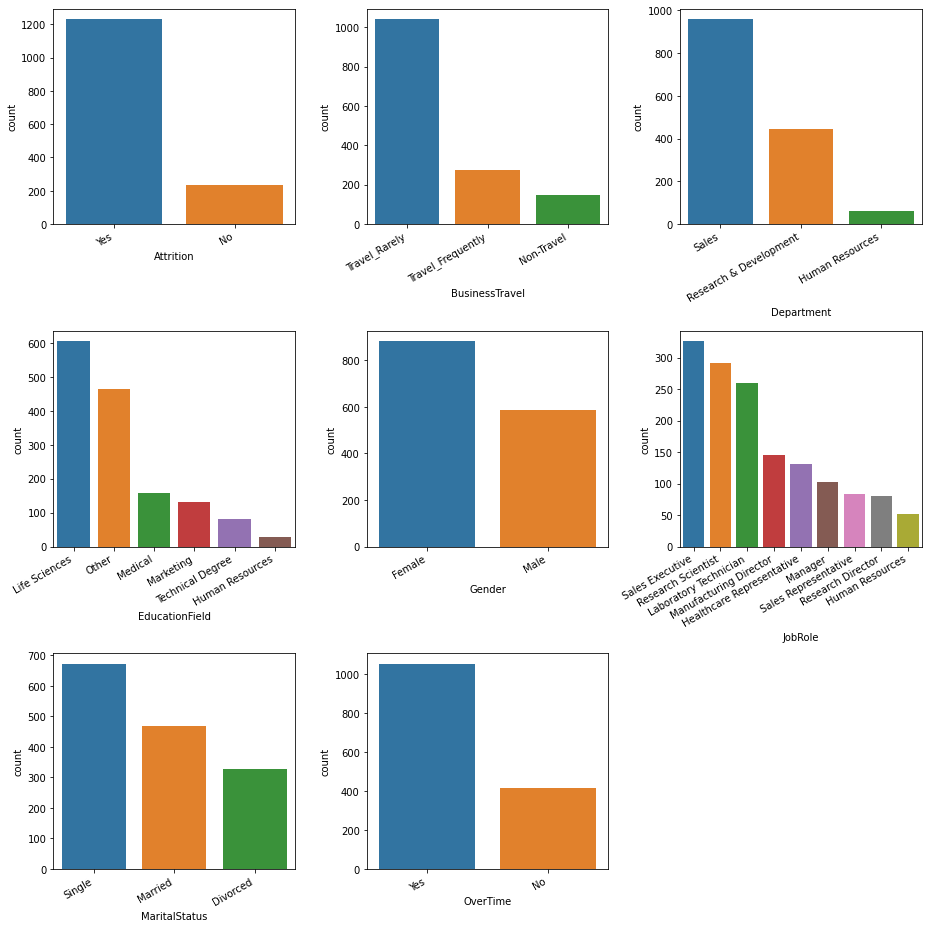

In [ ]:
fig, ax = plt.subplots(3,3, figsize = (13,13))

ax = np.ravel(ax)
for i in range(len(data_categorical_cols)):
    sns.countplot(data = data, x = data_categorical_cols[i], ax = ax[i], order = data[data_categorical_cols[i]].value_counts().index)
    ax[i].set_xticklabels(labels = data[data_categorical_cols[i]].unique(), rotation=30, ha='right')
#ax = np.reshape(ax, (3, 3))
for i in range(len(data_categorical_cols), 3*3):
    ax[i].axis("off")
    
plt.tight_layout()

In [ ]:
for i in range(len(data_categorical_cols)):
  print(data.groupby(data_categorical_cols[i]).size())
  print('-------------')


Attrition
No     1233
Yes     237
dtype: int64
-------------
BusinessTravel
Non-Travel            150
Travel_Frequently     277
Travel_Rarely        1043
dtype: int64
-------------
Department
Human Resources            63
Research & Development    961
Sales                     446
dtype: int64
-------------
EducationField
Human Resources      27
Life Sciences       606
Marketing           159
Medical             464
Other                82
Technical Degree    132
dtype: int64
-------------
Gender
Female    588
Male      882
dtype: int64
-------------
JobRole
Healthcare Representative    131
Human Resources               52
Laboratory Technician        259
Manager                      102
Manufacturing Director       145
Research Director             80
Research Scientist           292
Sales Executive              326
Sales Representative          83
dtype: int64
-------------
MaritalStatus
Divorced    327
Married     673
Single      470
dtype: int64
-------------
OverTime
No     1054
Y

Observations from the above graphs



*   Attrition Feature data is imbalanced
*   Over18 Feature is Yes fro all the data so we drop that feature




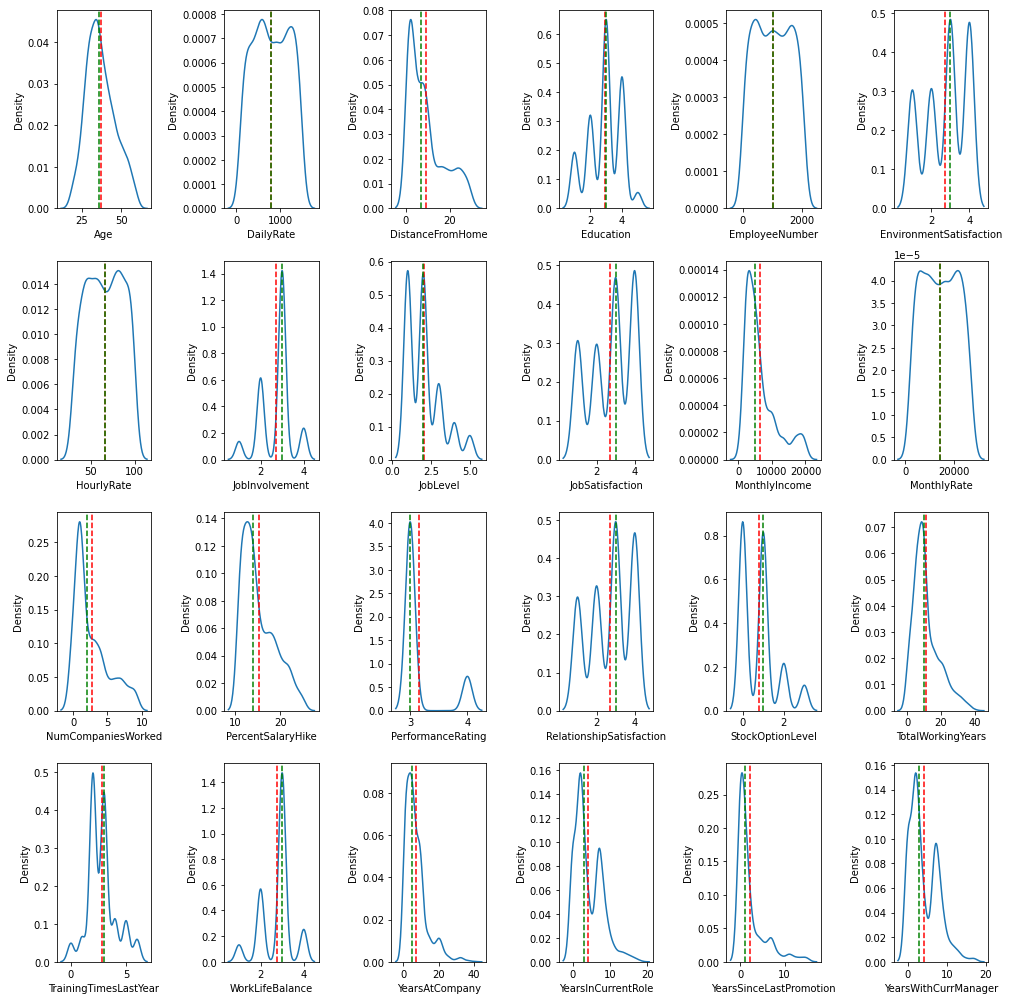

In [ ]:
fig, ax = plt.subplots(4,6, figsize = (14,14))

ax = np.ravel(ax)
for i in range(len(data_numeric_cols)):
    sns.kdeplot(data[data_numeric_cols[i]], ax = ax[i])
    ax[i].axvline(data[data_numeric_cols[i]].mean(), linestyle = '--', color = "red")
    ax[i].axvline(data[data_numeric_cols[i]].median(), linestyle = '--', color = "green")

# for i in range(len(data_numeric_cols), 6*5):
#     ax[i].axis("off")
    
plt.tight_layout()

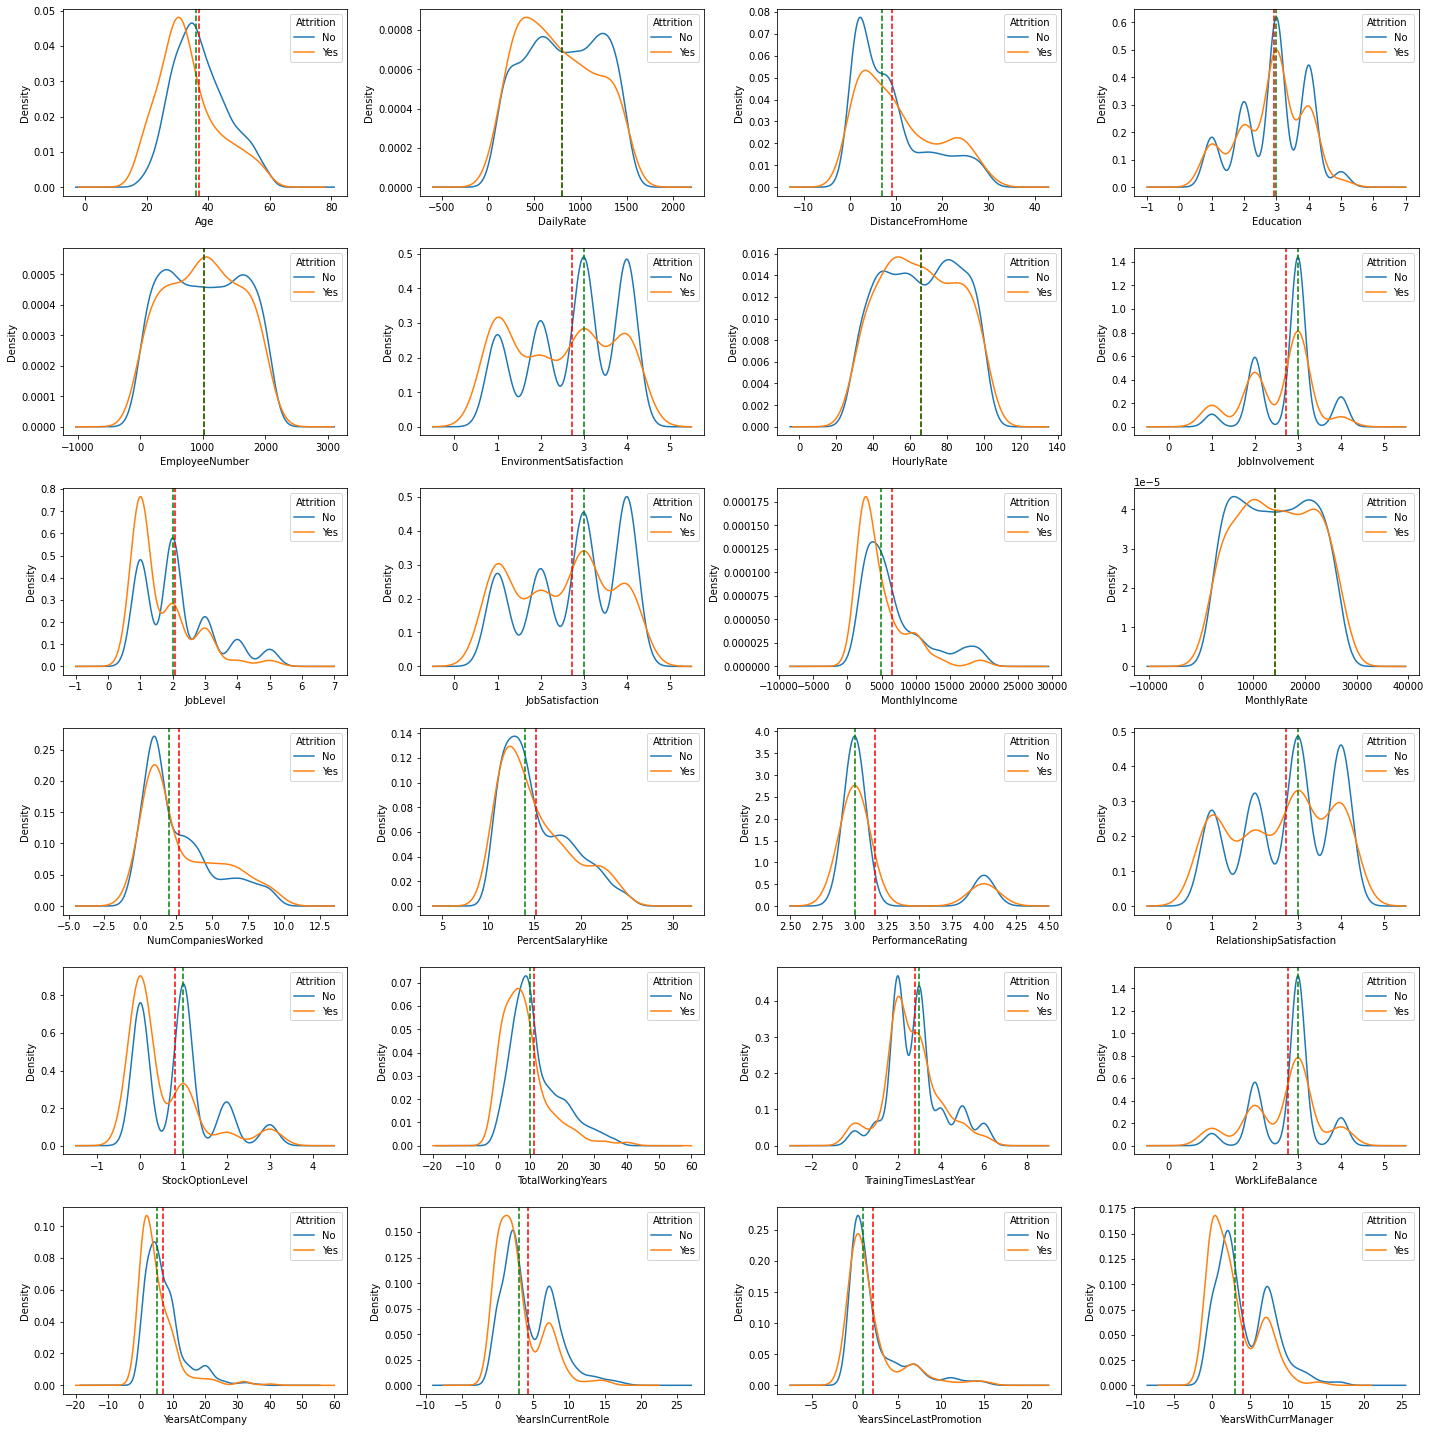

In [ ]:
fig, ax = plt.subplots(6,4, figsize = (16,16))

ax = np.ravel(ax)
for i in range(len(data_numeric_cols)):
    data_wide = data.pivot(columns ='Attrition' ,
                     values = data_numeric_cols[i])
    data_wide.plot.kde(ax = ax[i],figsize = (20, 20))
    ax[i].axvline(data[data_numeric_cols[i]].mean(), linestyle = '--', color = "red")
    ax[i].axvline(data[data_numeric_cols[i]].median(), linestyle = '--', color = "green")
    ax[i].set_xlabel(data_numeric_cols[i])
   
    

# for i in range(len(data_numeric_cols), 6*5):
#     ax[i].axis("off")
    
plt.tight_layout()

In [ ]:
skewdf=pd.DataFrame(columns=["Attribute","SkewValue","SkewStatus"])

for i in range(len(data_numeric_cols)):
  skew=data[data_numeric_cols[i]].skew()
  if(skew>1 or skew<-1):
    skewcomment="Highly skewed"
  elif((skew<-1 and skew>0.5) or (skew>0.5 and skew<1)):
    skewcomment="Moderately skewed"
  else:
    skewcomment="Approximately symmetric"
  
  skewdf=skewdf.append({'Attribute':data_numeric_cols[i],'SkewValue':data[data_numeric_cols[i]].skew(),'SkewStatus':skewcomment},ignore_index=True)

  #print(data_numeric_cols[i],"  ",data[data_numeric_cols[i]].skew()," ",skewcomment)
skewdf



,Attribute,SkewValue,SkewStatus
0,Age,0.413,Approximately symmetric
1,DailyRate,-0.004,Approximately symmetric
2,DistanceFromHome,0.958,Moderately skewed
3,Education,-0.290,Approximately symmetric
4,EmployeeNumber,0.017,Approximately symmetric
5,EnvironmentSatisfaction,-0.322,Approximately symmetric
6,HourlyRate,-0.032,Approximately symmetric
7,JobInvolvement,-0.498,Approximately symmetric
8,JobLevel,1.025,Highly skewed
9,JobSatisfaction,-0.330,Approximately symmetric


In [ ]:
set_option('precision',3)
covariance=data.cov()
covariance

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,83.455,39.298,-0.125,1.946,-55.797,0.101,4.510,0.194,5.153,-4.929e-02,2.141e+04,1.824e+03,6.838,0.121,6.276e-03,0.529,0.292,48.362,-0.231,-1.387e-01,17.423,7.047,6.374,6.587
DailyRate,39.298,162819.594,-16.308,-6.945,-12386.713,8.096,191.800,13.246,1.325,1.360e+01,1.464e+04,-9.243e+04,38.457,33.529,6.891e-02,3.423,14.490,45.571,1.276,-1.079e+01,-84.187,14.520,-43.207,-37.957
DistanceFromHome,-0.125,-16.308,65.721,0.175,160.650,-0.142,5.131,0.051,0.048,-3.280e-02,-6.494e+02,1.585e+03,-0.592,1.194,7.930e-02,0.057,0.310,0.292,-0.386,-1.521e-01,0.472,0.554,0.262,0.417
Education,1.946,-6.945,0.175,1.049,25.939,-0.030,0.349,0.031,0.115,-1.276e-02,4.579e+02,-1.901e+02,0.323,-0.042,-9.068e-03,-0.010,0.016,1.182,-0.033,7.105e-03,0.434,0.224,0.179,0.252
EmployeeNumber,-55.797,-12386.713,160.650,25.939,362433.300,11.596,430.552,-2.951,-12.341,-3.071e+01,-4.203e+04,5.420e+04,-1.881,-28.520,-4.422e+00,-45.474,31.920,-67.290,18.320,4.384e+00,-41.458,-18.358,-17.497,-19.755
EnvironmentSatisfaction,0.101,8.096,-0.142,-0.030,11.596,1.195,-1.108,-0.006,0.001,-8.179e-03,-3.221e+01,2.925e+02,0.034,-0.127,-1.165e-02,0.009,0.003,-0.023,-0.027,2.133e-02,0.010,0.071,0.057,-0.019
HourlyRate,4.510,191.800,5.131,0.349,430.552,-1.108,413.286,0.620,-0.627,-1.599e+00,-1.512e+03,-2.213e+03,1.125,-0.674,-1.593e-02,0.029,0.871,-0.369,-0.224,-6.617e-02,-2.439,-1.776,-1.750,-1.460
JobInvolvement,0.194,13.246,0.051,0.031,-2.951,-0.006,0.620,0.506,-0.010,-1.685e-02,-5.116e+01,-8.267e+01,0.027,-0.045,-7.464e-03,0.026,0.013,-0.031,-0.014,-7.348e-03,-0.093,0.022,-0.055,0.066
JobLevel,5.153,1.325,0.048,0.115,-12.341,0.001,-0.627,-0.010,1.225,-2.373e-03,4.952e+03,3.117e+02,0.394,-0.141,-8.476e-03,0.026,0.013,6.737,-0.026,2.957e-02,3.626,1.562,1.262,1.482
JobSatisfaction,-0.049,13.604,-0.033,-0.013,-30.705,-0.008,-1.599,-0.017,-0.002,1.216e+00,-3.716e+01,5.055e+00,-0.153,0.081,9.141e-04,-0.015,0.010,-0.173,-0.008,-1.516e-02,-0.026,-0.009,-0.065,-0.109


In [ ]:
set_option('precision',3)
correlations=data.corr(method='pearson')
correlations

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000,1.066e-02,-0.002,0.208,-0.010,0.010,0.024,0.030,0.510,-4.892e-03,0.498,2.805e-02,0.300,0.004,1.904e-03,5.353e-02,0.038,0.680,-0.020,-0.021,0.311,0.213,0.217,2.021e-01
DailyRate,0.011,1.000e+00,-0.005,-0.017,-0.051,0.018,0.023,0.046,0.003,3.057e-02,0.008,-3.218e-02,0.038,0.023,4.733e-04,7.846e-03,0.042,0.015,0.002,-0.038,-0.034,0.010,-0.033,-2.636e-02
DistanceFromHome,-0.002,-4.985e-03,1.000,0.021,0.033,-0.016,0.031,0.009,0.005,-3.669e-03,-0.017,2.747e-02,-0.029,0.040,2.711e-02,6.557e-03,0.045,0.005,-0.037,-0.027,0.010,0.019,0.010,1.441e-02
Education,0.208,-1.681e-02,0.021,1.000,0.042,-0.027,0.017,0.042,0.102,-1.130e-02,0.095,-2.608e-02,0.126,-0.011,-2.454e-02,-9.118e-03,0.018,0.148,-0.025,0.010,0.069,0.060,0.054,6.907e-02
EmployeeNumber,-0.010,-5.099e-02,0.033,0.042,1.000,0.018,0.035,-0.007,-0.019,-4.625e-02,-0.015,1.265e-02,-0.001,-0.013,-2.036e-02,-6.986e-02,0.062,-0.014,0.024,0.010,-0.011,-0.008,-0.009,-9.197e-03
EnvironmentSatisfaction,0.010,1.835e-02,-0.016,-0.027,0.018,1.000,-0.050,-0.008,0.001,-6.784e-03,-0.006,3.760e-02,0.013,-0.032,-2.955e-02,7.665e-03,0.003,-0.003,-0.019,0.028,0.001,0.018,0.016,-4.999e-03
HourlyRate,0.024,2.338e-02,0.031,0.017,0.035,-0.050,1.000,0.043,-0.028,-7.133e-02,-0.016,-1.530e-02,0.022,-0.009,-2.172e-03,1.330e-03,0.050,-0.002,-0.009,-0.005,-0.020,-0.024,-0.027,-2.012e-02
JobInvolvement,0.030,4.613e-02,0.009,0.042,-0.007,-0.008,0.043,1.000,-0.013,-2.148e-02,-0.015,-1.632e-02,0.015,-0.017,-2.907e-02,3.430e-02,0.022,-0.006,-0.015,-0.015,-0.021,0.009,-0.024,2.598e-02
JobLevel,0.510,2.966e-03,0.005,0.102,-0.019,0.001,-0.028,-0.013,1.000,-1.944e-03,0.950,3.956e-02,0.143,-0.035,-2.122e-02,2.164e-02,0.014,0.782,-0.018,0.038,0.535,0.389,0.354,3.753e-01
JobSatisfaction,-0.005,3.057e-02,-0.004,-0.011,-0.046,-0.007,-0.071,-0.021,-0.002,1.000e+00,-0.007,6.439e-04,-0.056,0.020,2.297e-03,-1.245e-02,0.011,-0.020,-0.006,-0.019,-0.004,-0.002,-0.018,-2.766e-02


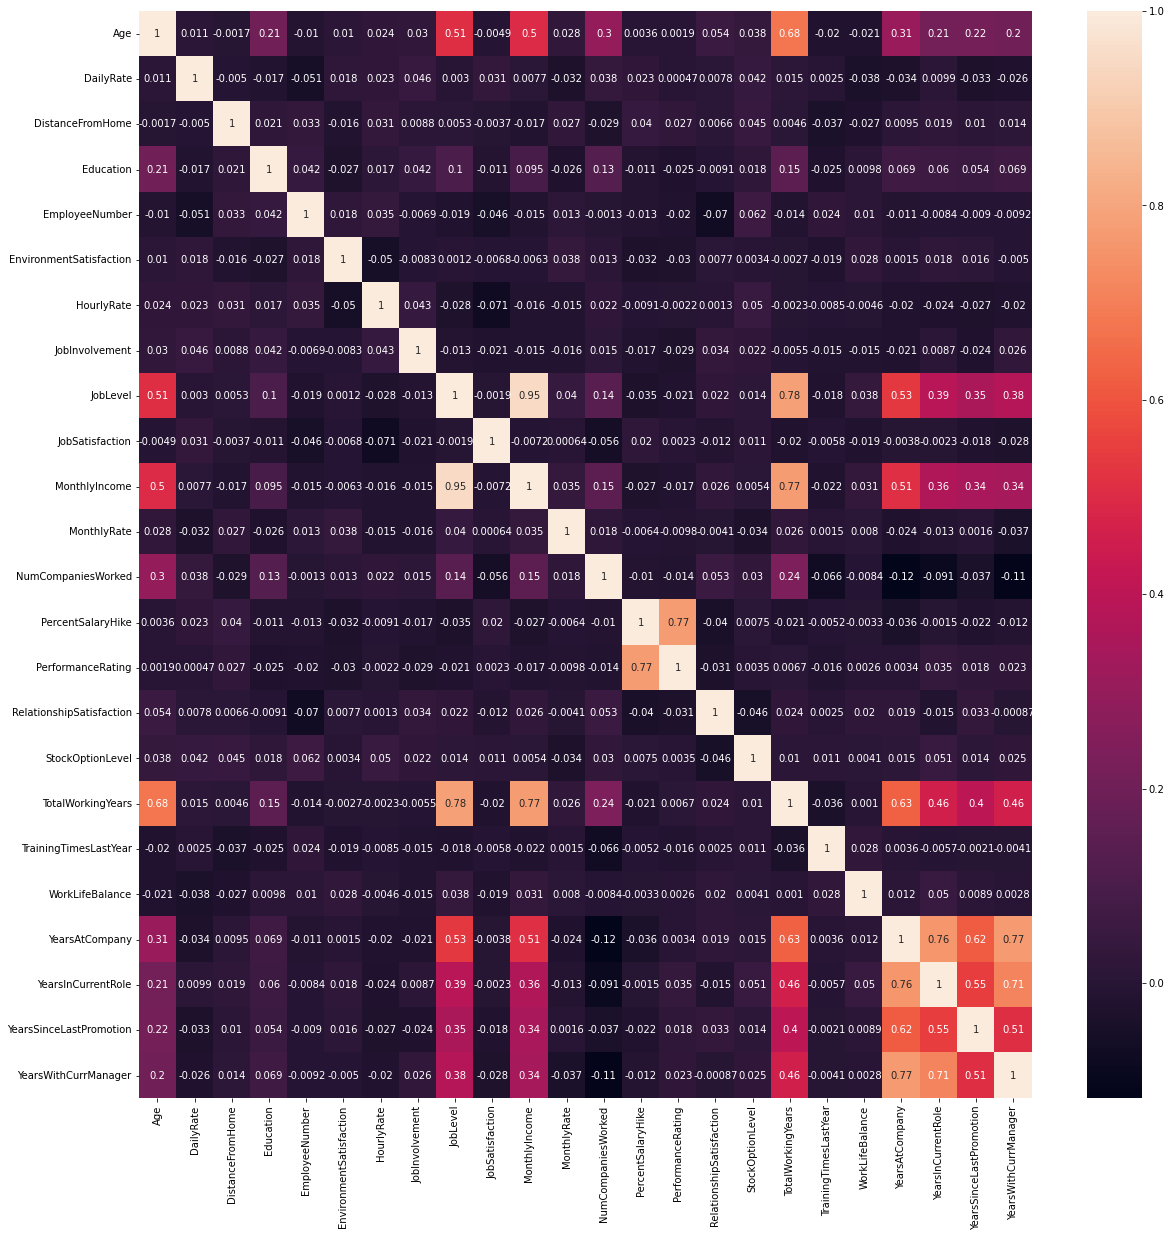

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True)

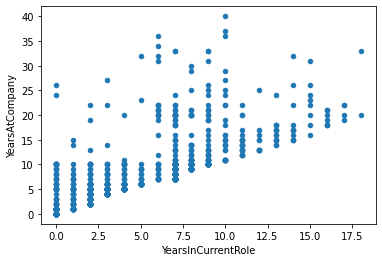

In [ ]:
data.plot(x='YearsInCurrentRole',y='YearsAtCompany',kind='scatter')

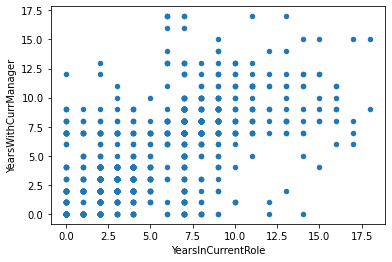

In [ ]:
data.plot(x='YearsInCurrentRole',y='YearsWithCurrManager',kind='scatter')

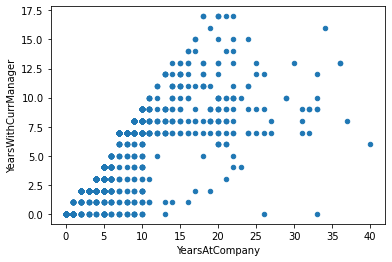

In [ ]:
data.plot(x='YearsAtCompany',y='YearsWithCurrManager',kind='scatter')

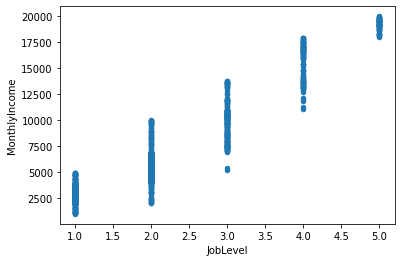

In [ ]:
data.plot(x='JobLevel',y='MonthlyIncome',kind='scatter')

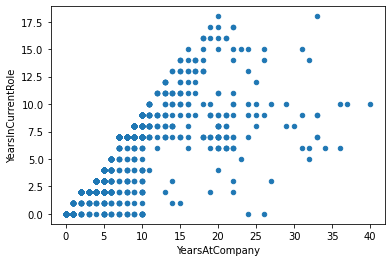

In [ ]:
data.plot(x='YearsAtCompany',y='YearsInCurrentRole',kind='scatter')

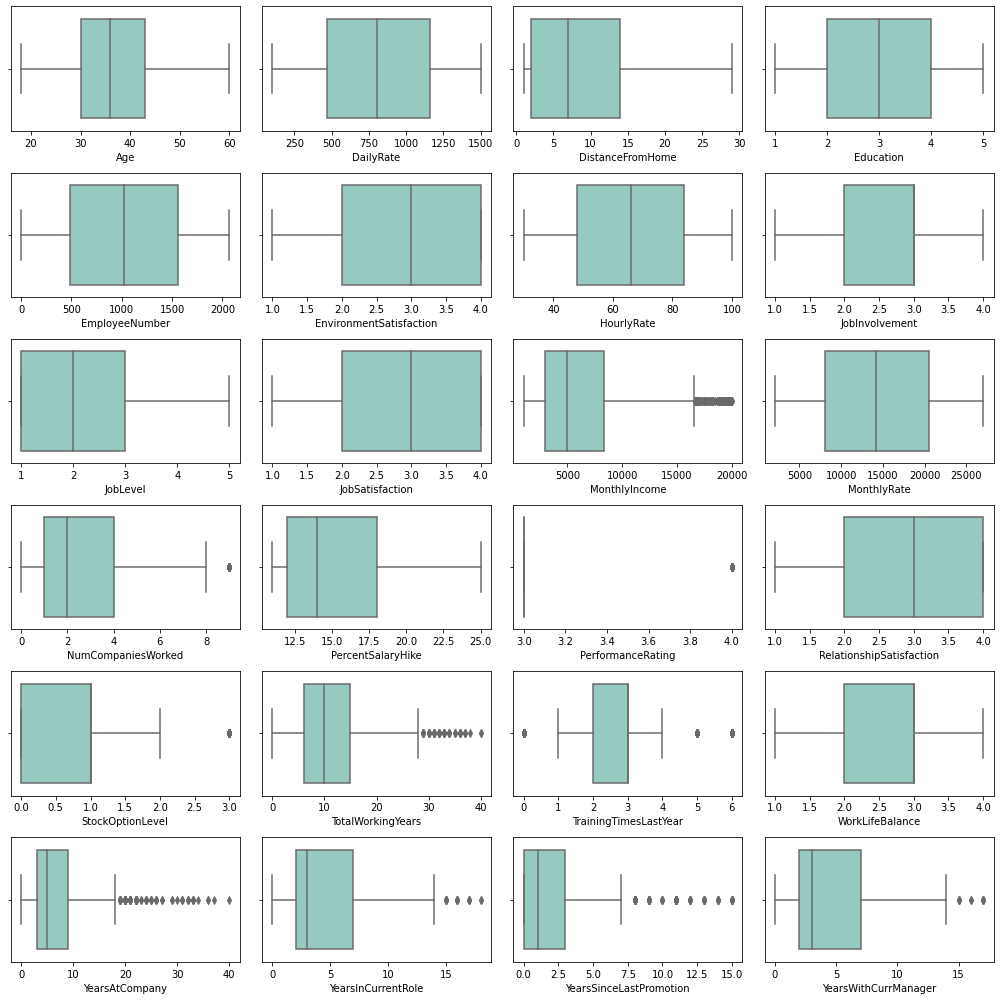

In [ ]:

fig, ax = plt.subplots(6,4, figsize = (14,14))

ax = np.ravel(ax)
for i in range(len(data_numeric_cols)):
  sns.boxplot(ax = ax[i],palette = "Set3",x = data[data_numeric_cols[i]])


    

# for i in range(len(data_numeric_cols), 6*5):
#     ax[i].axis("off")
    
plt.tight_layout()

In [ ]:
Q1=data.quantile(0.25)
Q3=data.quantile(0.75)
IQR=Q3-Q1
print(IQR)

Age                            13.00
DailyRate                     692.00
DistanceFromHome               12.00
Education                       2.00
EmployeeNumber               1064.50
EnvironmentSatisfaction         2.00
HourlyRate                     35.75
JobInvolvement                  1.00
JobLevel                        2.00
JobSatisfaction                 2.00
MonthlyIncome                5468.00
MonthlyRate                 12414.50
NumCompaniesWorked              3.00
PercentSalaryHike               6.00
PerformanceRating               0.00
RelationshipSatisfaction        2.00
StockOptionLevel                1.00
TotalWorkingYears               9.00
TrainingTimesLastYear           1.00
WorkLifeBalance                 1.00
YearsAtCompany                  6.00
YearsInCurrentRole              5.00
YearsSinceLastPromotion         3.00
YearsWithCurrManager            5.00
dtype: float64


In [ ]:
Lower=Q1-1.5*IQR
Upper=Q3+1.5*IQR

In [ ]:
Lower

Age                            10.500
DailyRate                    -573.000
DistanceFromHome              -16.000
Education                      -1.000
EmployeeNumber              -1105.500
EnvironmentSatisfaction        -1.000
HourlyRate                     -5.625
JobInvolvement                  0.500
JobLevel                       -2.000
JobSatisfaction                -1.000
MonthlyIncome               -5291.000
MonthlyRate                -10574.750
NumCompaniesWorked             -3.500
PercentSalaryHike               3.000
PerformanceRating               3.000
RelationshipSatisfaction       -1.000
StockOptionLevel               -1.500
TotalWorkingYears              -7.500
TrainingTimesLastYear           0.500
WorkLifeBalance                 0.500
YearsAtCompany                 -6.000
YearsInCurrentRole             -5.500
YearsSinceLastPromotion        -4.500
YearsWithCurrManager           -5.500
dtype: float64

In [ ]:
Upper

Age                            62.500
DailyRate                    2195.000
DistanceFromHome               32.000
Education                       7.000
EmployeeNumber               3152.500
EnvironmentSatisfaction         7.000
HourlyRate                    137.375
JobInvolvement                  4.500
JobLevel                        6.000
JobSatisfaction                 7.000
MonthlyIncome               16581.000
MonthlyRate                 39083.250
NumCompaniesWorked              8.500
PercentSalaryHike              27.000
PerformanceRating               3.000
RelationshipSatisfaction        7.000
StockOptionLevel                2.500
TotalWorkingYears              28.500
TrainingTimesLastYear           4.500
WorkLifeBalance                 4.500
YearsAtCompany                 18.000
YearsInCurrentRole             14.500
YearsSinceLastPromotion         7.500
YearsWithCurrManager           14.500
dtype: float64

In [ ]:


chi_df=pd.DataFrame(columns=["Feature A","Feature B","Depedency"])

   
for i in range(len(data_categorical_cols)):
  for j in range(i,len(data_categorical_cols)):
    print("-------------------")
    print(data_categorical_cols[i],data_categorical_cols[j])
    table=pd.crosstab(data[data_categorical_cols[i]],data[data_categorical_cols[j]])
    Observed_values=table.values
    chi2_test_statistc,p,dof,expected=sp.chi2_contingency(table)
    prob=0.95
    critical=chi2.ppf(prob,dof)
    print("critical",critical," ","chi2_test_statistic",chi2_test_statistc)
    if chi2_test_statistc >= critical:
      print('Dependent (reject HØ)')
    else:
      print('Independent (fail to reject HB)')
    alpha = 1.0 - prob
    print('significance=%.3f, p= %.3f' % (alpha, p))
    if p <= alpha:
      print('Dependent (reject H0)')
      chi_df=chi_df.append({'Feature A':data_categorical_cols[i],'Feature B':data_categorical_cols[j],'Depedency':'Dependent'},ignore_index=True)
    else:
      print('Independent (fail to reject HØ)')
      chi_df=chi_df.append({'Feature A':data_categorical_cols[i],'Feature B':data_categorical_cols[j],'Depedency':'Independent'},ignore_index=True)
    
   

     


-------------------
Attrition Attrition
critical 3.841458820694124   chi2_test_statistic 1462.6145539474094
Dependent (reject HØ)
significance=0.050, p= 0.000
Dependent (reject H0)
-------------------
Attrition BusinessTravel
critical 5.991464547107979   chi2_test_statistic 24.182413685655174
Dependent (reject HØ)
significance=0.050, p= 0.000
Dependent (reject H0)
-------------------
Attrition Department
critical 5.991464547107979   chi2_test_statistic 10.79600732241067
Dependent (reject HØ)
significance=0.050, p= 0.005
Dependent (reject H0)
-------------------
Attrition EducationField
critical 11.070497693516351   chi2_test_statistic 16.024674119585423
Dependent (reject HØ)
significance=0.050, p= 0.007
Dependent (reject H0)
-------------------
Attrition Gender
critical 3.841458820694124   chi2_test_statistic 1.1169671241970975
Independent (fail to reject HB)
significance=0.050, p= 0.291
Independent (fail to reject HØ)
-------------------
Attrition JobRole
critical 15.50731305586545   

In [ ]:
# import pandas_profiling as pp
# profile = pp.ProfileReport(data)
# profile.to_notebook_iframe()


In [ ]:
##! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

In [ ]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,No,17,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,No,15,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Yes,20,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,No,14,3,4,0,17,3,2,9,6,0,8


In [ ]:
data["Attrition"] = LabelEncoder().fit_transform(data['Attrition'])
data["BusinessTravel"] = LabelEncoder().fit_transform(data['BusinessTravel'])
data["Department"] = LabelEncoder().fit_transform(data['Department'])
data["EducationField"] = LabelEncoder().fit_transform(data['EducationField'])
data["Gender"] = LabelEncoder().fit_transform(data['Gender'])
data["JobRole"] = LabelEncoder().fit_transform(data['JobRole'])
data["MaritalStatus"] = LabelEncoder().fit_transform(data['MaritalStatus'])
data["OverTime"] = LabelEncoder().fit_transform(data['OverTime'])

In [ ]:
data[data_categorical_cols]

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,1,2,2,1,0,7,2,1
1,0,1,1,1,1,6,1,0
2,1,2,1,4,1,2,2,1
3,0,1,1,1,0,6,1,1
4,0,2,1,3,1,2,1,0
...,...,...,...,...,...,...,...,...
1465,0,1,1,3,1,2,1,0
1466,0,2,1,3,1,0,1,0
1467,0,2,1,1,1,4,1,1
1468,0,1,2,3,1,7,1,0


In [ ]:
columns = list(data.columns)
columns.remove("Attrition")
x,y = SMOTE().fit_resample(data[columns],data["Attrition"])
a=x

In [ ]:
x

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1,2,1,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,1,279,1,8,1,1,2,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,2,1373,1,2,2,4,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,1,1392,1,3,4,1,5,4,0,56,3,1,6,3,1,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,2,591,1,2,1,3,7,1,1,40,3,1,2,2,1,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2461,29,0,749,1,2,1,3,706,2,0,97,1,1,7,1,1,2219,20652,2,0,19,3,1,0,2,3,2,0,0,0,0
2462,42,1,704,1,16,2,3,1271,1,0,72,2,3,0,3,1,8061,13881,1,0,11,3,3,0,10,2,2,10,7,0,5
2463,24,2,326,2,4,2,1,252,2,0,49,2,2,7,3,2,5520,26543,2,0,11,3,3,0,5,1,3,5,3,0,2
2464,27,2,1155,1,10,3,4,689,2,1,61,3,1,4,3,1,2212,19571,0,0,16,3,3,0,4,0,2,3,1,0,2


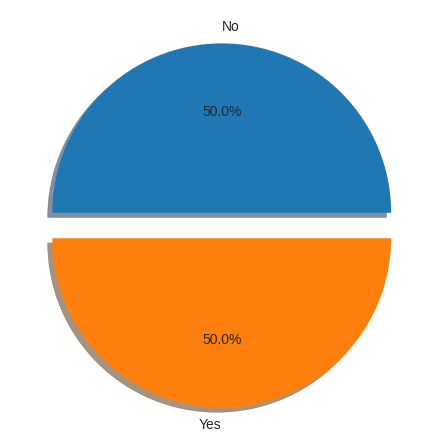

In [ ]:
a['Attrition']=y
r = a.groupby('Attrition')['Attrition'].count()
plt.pie(r, explode=[0.05, 0.1], labels=['No', 'Yes'], radius=1, autopct='%1.1f%%',  shadow=True);